In [26]:
%matplotlib inline

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression

## 01. Intorduction to Machine Learning

### Live Demo

In [28]:
df = pd.read_csv('data/diabetic_data.csv', na_values=['?'])

C:\Users\Master\AppData\Local\Temp\ipykernel_15552\1967939165.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/diabetic_data.csv', na_values=['?'])


In [29]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


We want to make a model that checks bss readmitted feature which treatment is best

In [30]:
df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [31]:
df.readmitted.value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

We see that NOT readmitted is largest, above 30 days is second, below < 30 less.
If we want we can combine >30 and < 30 with YES / NO classification.
The variable is categorical and is target, we need **classification** algorithms

In [33]:
df.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [34]:
df.gender.value_counts(dropna=False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [36]:
df.age.value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [39]:
# normalizing the data in %
df.age.value_counts(dropna=False) / len(df) * 100

age
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: count, dtype: float64

As we have BIAS in the data, the age above 50 has a lot of records, therefore, the model will not be accurate for young people. The model will be *tuned* for the **biggest** count of the variable.

In [42]:
df.discharge_disposition_id.value_counts(dropna=False)

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

This variable is considered HIGH CARDINALITY - the categorial variable has many values. The level of the category is the count of the unique values in it. This is **HIGH LEVEL CAT**.
We can:
1. Do nothing,
2. Unite on certain bassis
3. Can be dropped from DS with **COUTION**. For the demo will be dropped in order to be able to create a model

In [43]:
df.metformin.value_counts(dropna=False)

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

Above is categorical

In [51]:
df.patient_nbr

0           8222157
1          55629189
2          86047875
3          82442376
4          42519267
            ...    
101761    100162476
101762     74694222
101763     41088789
101764     31693671
101765    175429310
Name: patient_nbr, Length: 101766, dtype: int64

It is type int, however, we cannot perform matematical operations on the ID, so it is considered 'categorical'. The variable has **TOO BIG ENTROPY**, brings less information.

In [47]:
df.patient_nbr.nunique() / len(df)

0.7027690977340173

In [48]:
df.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

In [50]:
df[df.patient_nbr == 88785891]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38307,119039172,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
40252,125094312,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,<30
40661,126171582,88785891,Caucasian,Female,[20-30),NaN,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,>30
44515,137245596,88785891,Caucasian,Female,[20-30),NaN,3,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45147,139425576,88785891,Caucasian,Female,[20-30),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45986,141994242,88785891,Caucasian,Female,[20-30),NaN,2,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50167,150986298,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50393,151413846,88785891,Caucasian,Female,[20-30),NaN,1,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50773,152188656,88785891,Caucasian,Female,[20-30),NaN,2,7,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
51519,153558456,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30


Separating the **target**. Remaining will be called **attributes**

In [53]:
attr = df.drop(columns='readmitted')

In [56]:
trgt = df['readmitted']

In [57]:
trgt

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

We drop varibales (columns) from the **attr** and **WRITE DOWN WHY ARE WE DOING THAT!!!** In our case, the 'encounter_id' & 'patient_nbr' are considered categorical variables with high entropy and no value for our model

In [60]:
attr = attr.drop(columns=['encounter_id', 'patient_nbr'])

In [64]:
attr.diag_1.value_counts()

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
817       1
61        1
148       1
870       1
V51       1
Name: count, Length: 716, dtype: int64

As per the DS description, we have more than 800 distinct values, **HIGH ENTROPY** -> useless. We have NaN values:

In [70]:
len(attr[attr.diag_3.isna()])

1423

We can remove them, however if we drop them, all attr df will have 0 observations. So we can remove NaN id different cols only. The *WEIGHT* col will be dropped due to too many missing values.

In [72]:
attr.weight.isna().count()

101766

In [73]:
attr = attr.drop(columns='weight')

Removing further more usless columns with too many NaNs

In [ ]:
attr = attr.drop(columns=['payer_code', 'medical_specialty'])

We now check the numeric variables.

<Axes: >

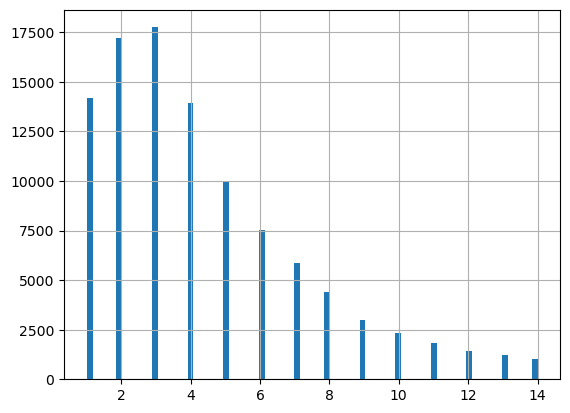

In [81]:
df.time_in_hospital.hist(bins='fd')

<Axes: >

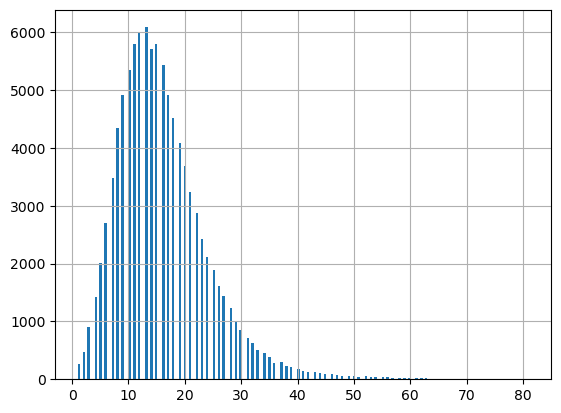

In [82]:
df.num_medications.hist(bins='fd')

Some patients are taking more than 50 medicaments!! Useless depending of what we want to achieve. There is problem with this huge range from 0 to 80. And normally is a lot more, times times more. The problem arises when we save a number into the RAM, the number is not saved exact and we obtain numerical errors from basiccomputer math operations.

In [83]:
0.1 + 0.2

0.30000000000000004

We have error from rounding:

In [93]:
10000000000000000.0 + 1 == 10000000000000000.0

True

the errorrs are less if the numbers we are working with are in range [-1: 1]. So we must pass numbers to the model close to 0. Therefore we are scaling the data using Z-score or other methods. Below is Z-Score example:

In [96]:
zscore = (df.num_medications - df.num_medications.mean()) / df.num_medications.std()

<Axes: >

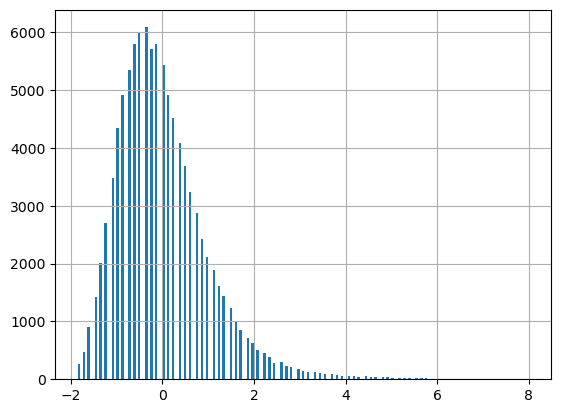

In [97]:
zscore.hist(bins='fd')

Below min-max scaling

In [100]:
min_max = (df.num_medications - df.num_medications.min()) / (df.num_medications.max() - df.num_medications.min())

<Axes: >

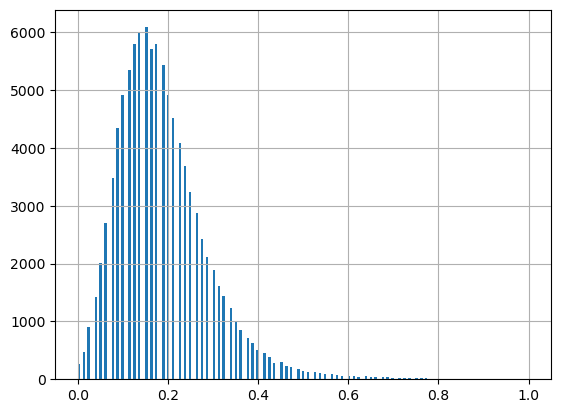

In [102]:
min_max.hist(bins='fd')

Category vars -> must be passed as numbers to the model. We cannot pass a string to a model

In [104]:
df.metformin

0             No
1             No
2             No
3             No
4             No
           ...  
101761    Steady
101762        No
101763    Steady
101764        No
101765        No
Name: metformin, Length: 101766, dtype: object

In [106]:
# similar to melt
pd.get_dummies(df.metformin).astype(int)

,Down,No,Steady,Up
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
101761,0,0,1,0
101762,0,1,0,0
101763,0,0,1,0
101764,0,1,0,0


In [108]:
# change in column names
pd.get_dummies(df[['metformin']]).astype(int)

,metformin_Down,metformin_No,metformin_Steady,metformin_Up
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
101761,0,0,1,0
101762,0,1,0,0
101763,0,0,1,0
101764,0,1,0,0


We need to encode the values with different encoding. Like **one-hot** or **multy** encoding

In [109]:
attr.metformin.replace({'No':-99, 'Down': -1, 'Steady': 0, 'Up': 1})

C:\Users\Master\AppData\Local\Temp\ipykernel_15552\1612677483.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  attr.metformin.replace({'No':-99, 'Down': -1, 'Steady': 0, 'Up': 1})


0        -99
1        -99
2        -99
3        -99
4        -99
          ..
101761     0
101762   -99
101763     0
101764   -99
101765   -99
Name: metformin, Length: 101766, dtype: int64

Now it is in numbers. We must pass all categorical vars in the encoding process. The model will work with the numbers without knowing that these are categories. In order not to confuse the model, we must encode using **get_dummies** and spread to more columns the variable

In [112]:
pd.get_dummies(attr)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,True,False,True,False,True,False,False,True,True,False
1,1,1,7,3,59,0,18,0,0,0,...,True,False,True,False,True,False,True,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,True,False,True,False,True,False,False,True,False,True
3,1,1,7,2,44,1,16,0,0,0,...,True,False,True,False,True,False,True,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,True,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,51,0,16,0,0,0,...,True,False,True,False,True,False,True,False,False,True
101762,1,4,5,5,33,3,18,0,0,1,...,True,False,True,False,True,False,False,True,False,True
101763,1,1,7,1,53,0,9,1,0,0,...,True,False,True,False,True,False,True,False,False,True
101764,2,3,7,10,45,2,21,0,0,1,...,True,False,True,False,True,False,True,False,False,True


The column number is increased, however the model can work with that! We can also reduce the cols using **drop_first**

In [121]:
attr = pd.get_dummies(attr, drop_first=True)

Now we need to scale the values (normalize). Importing minmax scaler, fit to the current attributes

In [117]:
MinMaxScaler()

MinMaxScaler()

In [119]:
scaler = MinMaxScaler()

In [122]:
scaler.fit(attr)

MinMaxScaler()

In [127]:
# original value range
scaler.data_range_

array([ 7., 27., 24., ...,  1.,  1.,  1.])

In [129]:
# transform scale / normalize where the max is 1 and min is 0
attr = scaler.transform(attr)

In [130]:
attr.max(axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [131]:
attr.min(axis=0)

array([0., 0., 0., ..., 0., 0., 0.])

The output is numpy array

In [134]:
# same as original df
attr.shape

(101766, 2330)

In [138]:
# everything is a floa
attr.dtype

dtype('float64')

The other option is OneHotEncoder, LabelEncoder. The LabelEncoder is **REPLACE** function. These operations are **ONLY FOR THE ATTRIBUTES, NOT FOR THE TARGET**. For SKLEARN model, must have 2D array, sorted values, row - observation, column - feature. We use LogisticRegression. We are passing the attributes as array and target column.

In [140]:
model = LogisticRegression()

In [142]:
model.fit(attr, trgt)

C:\Users\Master\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The ML is to **PASS CORRECT DATA** and **EVALUATE THE MODEL**. It seems that the fitting was not completed with success. However:

In [144]:
model.score(attr, trgt)

0.584409331210817

The score is **classification accuracy**. We need to evaluate if the score is OK for us. Otherwise we can make feature engineering, feature selections etc to increase the score, finetune it etc.